## Project 3

Your assignment involves combining information from a number of SQL tables, then displaying the information in a pandas DataFrame. For your relational database management system, you may use any RDBMS, including MySQL, PostgreSQL, sqlite, or any of the other RDMBSs supported by the database in Step 1 below.

1. For your database, you should download and install the appropriate version of the Chinook database for your RDBMS, which is available here, under the downloads tab: https://chinookdatabase.codeplex.com/
1. Your task is to create a pandas DataFrame that displays Customers’ Last Name and First Name, and each customer’s purchased Track names and Album Titles. The information should be sorted by Customer LastName then Customer FirstName. The first five rows of your results should look like this: 
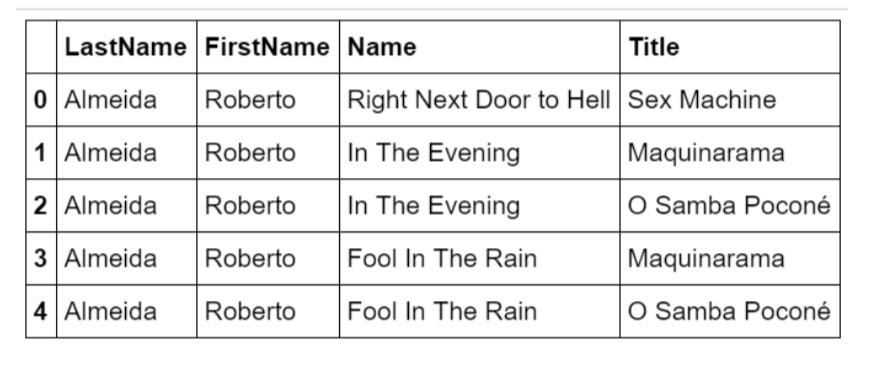
When writing your SQL query, you may find it helpful to consult the provided Chinook data model here: https://chinookdatabase.codeplex.com/wikipage?title=Chinook_Schema&refe rringTitle=Documentation.



In [1]:
import pandas as pd
import sqlite3

In [2]:
query = '''SELECT c.LastName as "Last Name", c.FirstName as "First Name", t.Name as "Song Title", a.Title as "Album"
         FROM Customer as c
         INNER JOIN Invoice as i 
         ON c.CustomerId = i.CustomerId
         INNER JOIN InvoiceLine as il
         ON i.InvoiceId = il.InvoiceId
         INNER JOIN Track as t
         ON il.TrackId = t.TrackId
         INNER JOIN Album as a
         ON t.AlbumId = a.AlbumId
         ORDER BY c.LastName, c.FirstName'''

In [3]:
con = sqlite3.connect("C:/Users/pamel/Dropbox/CUNY SPS/IS 362 - Data Acquisition and Mgmt\Week 9/Chinook_Sqlite.sqlite")

In [4]:
df = pd.read_sql_query(query , con=con)
df

,Last Name,First Name,Song Title,Album
0,Almeida,Roberto,Right Next Door to Hell,Use Your Illusion I
1,Almeida,Roberto,In The Evening,In Through The Out Door
2,Almeida,Roberto,Fool In The Rain,In Through The Out Door
3,Almeida,Roberto,Saudade Dos Aviões Da Panair (Conversando No Bar),Minas
4,Almeida,Roberto,Caso Você Queira Saber,Minas
...,...,...,...,...
2235,Zimmermann,Fynn,Nothin' To Lose,Unplugged [Live]
2236,Zimmermann,Fynn,Since I've Been Loving You,BBC Sessions [Disc 2] [Live]
2237,Zimmermann,Fynn,Going To California,BBC Sessions [Disc 2] [Live]
2238,Zimmermann,Fynn,We're Gonna Groove,Coda


In [5]:
df.head()

,Last Name,First Name,Song Title,Album
0,Almeida,Roberto,Right Next Door to Hell,Use Your Illusion I
1,Almeida,Roberto,In The Evening,In Through The Out Door
2,Almeida,Roberto,Fool In The Rain,In Through The Out Door
3,Almeida,Roberto,Saudade Dos Aviões Da Panair (Conversando No Bar),Minas
4,Almeida,Roberto,Caso Você Queira Saber,Minas
